# Prosjekt 1: Datahåndtering og statistikk
_Jakob Ruth_ 


### Beskrivelse av data:
Dataene er hentet fra en Garmin forerunner 945 under en rulleski treningsøkt pulsen er samlet inn av et garmin pulsbelte. Det ble lastet ned som en TCX fil og omgjort til en parquet fil ved hjelp av følgende program:


In [52]:
'''
import numpy as np
import pylab as plt
import pandas as pd



f = open(r'C:\Skole\Programing\Prosjekt høst\Del 2\activity_17462054947.tcx','rt')
lines = f.readlines()
f.close()

old_time = -1
i=0
data = []
while i<len(lines):
    line = lines[i]
    if line.strip().startswith('<Time>'):
        time = np.datetime64(line.split('<Time>')[1].split('</Time>')[0])
        print(time)
    if line.strip().startswith('<AltitudeMeters>'):
        alt = np.float64(line.split('<AltitudeMeters>')[1].split('</AltitudeMeters>')[0])
        print(alt)
    if line.strip().startswith('<LatitudeDegrees>'):
        lat = np.float64(line.split('<LatitudeDegrees>')[1].split('</LatitudeDegrees>')[0])
        print(lat)
    if line.strip().startswith('<LongitudeDegrees>'):
        long = np.float64(line.split('<LongitudeDegrees>')[1].split('</LongitudeDegrees>')[0])
        print(long)
    if line.strip().startswith('<HeartRateBpm>'):
        i+=1
        line = lines[i]
        hr = np.float64(line.split('<Value>')[1].split('</Value>')[0])
        print(hr)
    if line.strip().startswith('<ns3:Speed>'):
        speed = np.float64(line.split('<ns3:Speed>')[1].split('</ns3:Speed>')[0])
        print(speed)
    if line.strip().startswith('<DistanceMeters>'):
        dist = np.float64(line.split('<DistanceMeters>')[1].split('</DistanceMeters>')[0])
        print(dist)
    if line.strip().startswith('</Trackpoint>'):
        data.append([time, alt, lat, long, dist, speed, hr])
    i+=1

df = pd.DataFrame(data, columns=['Time','Alt' ,'Lat', 'Long', 'Dist','Speed','Hr'])
df.to_parquet(r'C:\Skole\Programing\Prosjekt høst\Del 2\activity_17462054947.parquet')

fig, axs = plt.subplots(3,3,figsize=[8,8])
axs = np.ravel(axs)

ax = axs[0]
ax.plot(df.Time)

for i in [1,2,3,4,5,6]:
    ax = axs[i]
    ax.plot(df.Time, df.iloc[:,i])
    ax.set_title(df.columns[i])
fig.tight_layout()

plt.show()
'''

"\nimport numpy as np\nimport pylab as plt\nimport pandas as pd\n\n\n\nf = open(r'C:\\Skole\\Programing\\Prosjekt høst\\Del 2\x07ctivity_17462054947.tcx','rt')\nlines = f.readlines()\nf.close()\n\nold_time = -1\ni=0\ndata = []\nwhile i<len(lines):\n    line = lines[i]\n    if line.strip().startswith('<Time>'):\n        time = np.datetime64(line.split('<Time>')[1].split('</Time>')[0])\n        print(time)\n    if line.strip().startswith('<AltitudeMeters>'):\n        alt = np.float64(line.split('<AltitudeMeters>')[1].split('</AltitudeMeters>')[0])\n        print(alt)\n    if line.strip().startswith('<LatitudeDegrees>'):\n        lat = np.float64(line.split('<LatitudeDegrees>')[1].split('</LatitudeDegrees>')[0])\n        print(lat)\n    if line.strip().startswith('<LongitudeDegrees>'):\n        long = np.float64(line.split('<LongitudeDegrees>')[1].split('</LongitudeDegrees>')[0])\n        print(long)\n    if line.strip().startswith('<HeartRateBpm>'):\n        i+=1\n        line = lines[i]

Programmet ble ikke laget av meg, men Jeg hjalp til med å lage det og jeg forstår hvordan det fungerer. Det programmet gjør er bare å gå gjennom hver linje i TCX filen og skjekke om den starter med 'Time', 'AltitudeMeters','LatitudeDegrees','LongitudeDegrees', 'ns3:Speed' eller 'DistanceMeters' i <> og legger verdien til i hver sin variabel, deretter legger den til alle varieblene i en liste. Lager en pandas dataframe og lagrer dataframen som en parquet fil. En parquet fil er en type fil som lagrer dataene på "disken", SSD'en i mitt tilfelle, slik som det lagres i minnet. Da går det mye raskere å lese den senere. Her er ikke dette strengt tatt nødevendig, men ved større datasett, så kan dette være en stor fordel.

### Hypotese:
Jeg tror at siden dataene er fra en klokke, at farten og Strekningsforskjellen over en kort tid vil være det samme $V(t)=S'(t)$. Siden det er trangt om plass i en klokke så tror jeg de bruker samme sensor for dette. Jeg tror også at det kommer til å være god korrelasjon mellom puls og høydeenring samt fart og høydeenring. 

### Mål

### Oppstart

Importerer de nødvendige bibliotekene

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

Leser av dataene med pandas

In [54]:
df_raw=pd.read_parquet(r"C:\Skole\Programing\Prosjekt høst\Del 2\activity_17462054947.parquet")

In [55]:
df = df_raw.rename(columns={'Time':'Timestamp'}).drop_duplicates()
df['Time'] = (df.Timestamp-df.Timestamp.min()).dt.total_seconds()

Skjekke de første fem radene og ser etter at alt ser riktig ut, skjekker også infoen til datasettet for å skjekke at alt har riktig formatering

In [56]:
df.head()

,Timestamp,Alt,Lat,Long,Dist,Speed,Hr,Time
0,2024-11-05 07:56:45,53.200001,59.911312,10.502348,0.00,3.182,110.0,0.0
1,2024-11-05 07:56:46,53.200001,59.911334,10.502327,2.77,3.173,110.0,1.0
2,2024-11-05 07:56:49,53.200001,59.911412,10.502343,11.67,3.061,112.0,4.0
3,2024-11-05 07:56:52,53.599998,59.911486,10.502416,20.85,2.846,115.0,7.0
4,2024-11-05 07:56:55,54.000000,59.911574,10.502415,30.84,2.846,117.0,10.0


In [57]:
df

,Timestamp,Alt,Lat,Long,Dist,Speed,Hr,Time
0,2024-11-05 07:56:45,53.200001,59.911312,10.502348,0.000000,3.182,110.0,0.0
1,2024-11-05 07:56:46,53.200001,59.911334,10.502327,2.770000,3.173,110.0,1.0
2,2024-11-05 07:56:49,53.200001,59.911412,10.502343,11.670000,3.061,112.0,4.0
3,2024-11-05 07:56:52,53.599998,59.911486,10.502416,20.850000,2.846,115.0,7.0
4,2024-11-05 07:56:55,54.000000,59.911574,10.502415,30.840000,2.846,117.0,10.0
...,...,...,...,...,...,...,...,...
657,2024-11-05 08:32:25,54.799999,59.910723,10.503385,8916.500000,2.389,158.0,2140.0
658,2024-11-05 08:32:32,54.400002,59.910614,10.503617,8934.349609,2.585,156.0,2147.0
659,2024-11-05 08:32:38,54.400002,59.910563,10.503771,8944.919922,2.445,155.0,2153.0
660,2024-11-05 08:32:43,54.200001,59.910564,10.503788,8945.929688,0.159,152.0,2158.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 661
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        660 non-null    datetime64[ns]
 1   Alt              660 non-null    float64       
 2   Lat              660 non-null    float64       
 3   Long             660 non-null    float64       
 4   Dist             660 non-null    float64       
 5   Speed            660 non-null    float64       
 6   Hr               660 non-null    float64       
 7   Time             660 non-null    float64       
 8   Speed_from_dist  659 non-null    float64       
 9   Height_diff      659 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 56.7 KB


## Sammenhenger

##### Definisjoner:
S = Strenkning (m)\
T = Tid (s) \
V = Hastighet (km/h) \
Hr = Puls (Bpm) \
h = Høyde \
Høydeendring = $\dot{h}$ = h'(t)

#### Sammenheng mellom $S'(t)$ og V(t)

Vi kan starte med å se på om det er en sammenheng mellom avstandsforskjell fra punkt til punkt delt på tid og hastighet målt av klokken $S'(t)=\frac{S_0-S_1}{T_0-T_1}$. Med andre ord avstand derivert med hensyn på tid. $S'(t)$ og $v(t)$

In [94]:
df["Speed_from_dist"] = (df.Dist.shift(-1)-df.Dist)/(df.Time.shift(-1)-df.Time)

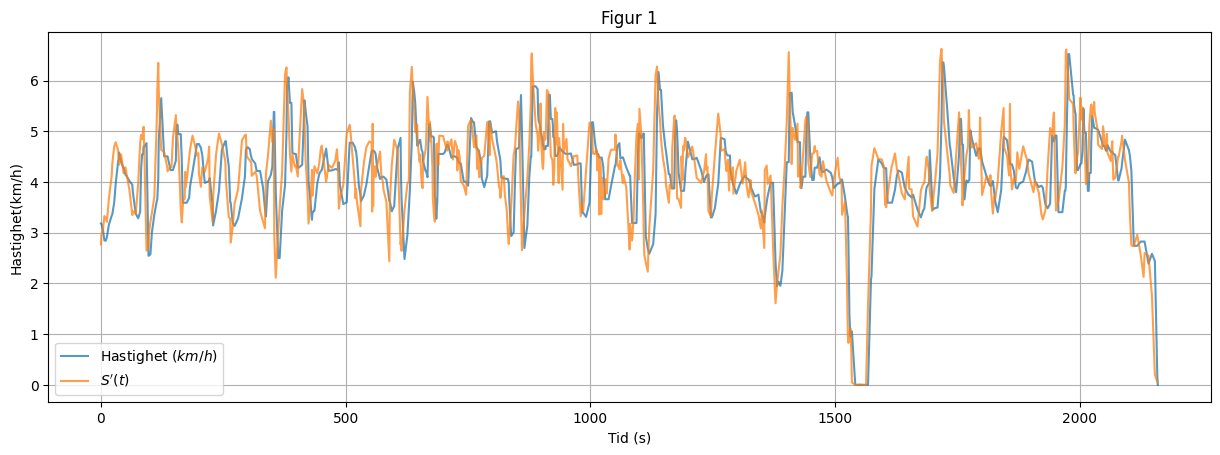

In [95]:
sns.palette="muted"
sns.lineplot(data=df, x="Time", y="Speed", alpha=0.75, label="Hastighet ($km/h$)")
sns.lineplot(data=df, x="Time", y="Speed_from_dist", alpha=0.75, label="$S'(t)$")
plt.gcf().set_figwidth(15)
plt.title("Figur 1")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet(km/h)")
plt.legend()
plt.grid()
plt.show()

Ut i fra grafen, så kan vi se at det er en sammenheng mellom Hastigheten og $S'(t)$, men at de ikke er helt like. Dersom vi plotter punkter gitt ved x= V(t) og y= $S'(t)$ så får vi følgene plott

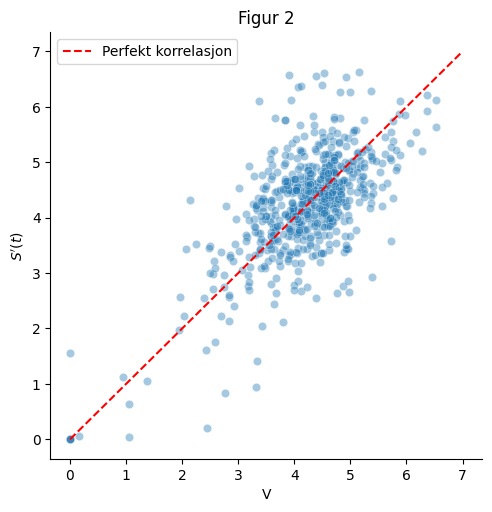

In [96]:
sns.relplot(data=df, x="Speed", y="Speed_from_dist", alpha=0.4)
plt.plot([0,7],[0,7],"r",linestyle="--", label= "Perfekt korrelasjon")
plt.title("Figur 2")
plt.xlabel("V")
plt.ylabel("$S'(t)$")
plt.legend()
plt.show()

Da kan vi se at det er en ganske god sammenheng mellom farten og $S'(t)$. Dette gir mening siden $S'(t)$ bare er et annet utrykk for fart. Ved perfekt korelasjon, altså at $S'(t)$=V(t), så vil r=1 og alle punktene ville ligget på den rød linjen. Da hadde y=x, eller $S'(t)=V(t)$. for å finne korrelasjonskoeffisienten så kan vi gjøre en korrelasjonsanalyse, da får vi en korrelasjon på:

In [97]:
korrelasjon_Speed_Speed_from_dist=df["Speed"].corr(df["Speed_from_dist"])
print("r = ", korrelasjon_Speed_Speed_from_dist)

r =  0.6683399607747841


Det er ikke like bra som forventet, men dersom vi ser tilbake på Figur 1, så ser vi at dataen muligens er forskjøvet. Om vi zoomer mer inn på plottet, så kan vi se at dette stemmer

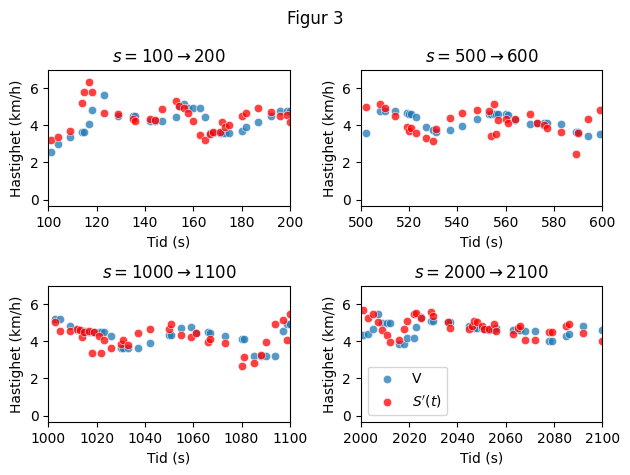

In [98]:
plt.suptitle("Figur 3")

plt.subplot(2,2,1)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 100 \rightarrow 200$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([100,200])

plt.subplot(2,2,2)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 500 \rightarrow 600$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([500,600])

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 1000 \rightarrow 1100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([1000,1100])

plt.subplot(2,2,4)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75, label="V")
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75, label = "$S'(t)$")
plt.title(r"$ s= 2000 \rightarrow 2100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([2000,2100])

plt.legend()
plt.gcf().tight_layout()
plt.show()

Det kan se ut som at alle farts punktene (V, de blå) er forskjøvet med ca 2-3 sekunder. Vi kan teste dette ved 

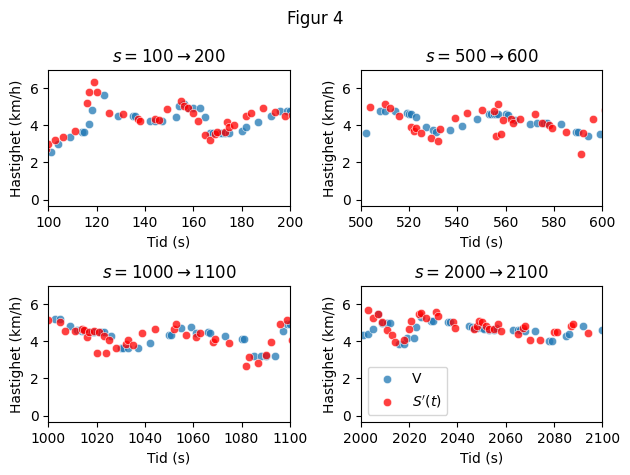

In [99]:
tid_2=df["Time"]+2
plt.suptitle("Figur 4")

plt.subplot(2,2,1)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 100 \rightarrow 200$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([100,200])

plt.subplot(2,2,2)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 500 \rightarrow 600$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([500,600])

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 1000 \rightarrow 1100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([1000,1100])

plt.subplot(2,2,4)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75, label="V")
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75, label = "$S'(t)$")
plt.title(r"$ s= 2000 \rightarrow 2100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([2000,2100])

plt.legend()
plt.gcf().tight_layout()
plt.show()

Vi ser da at det passer mye bedre om vi forskyver $S'(t)$ med to sekunder. Dette kan tyde på at det er et filter for hastigheten, noe som vil senke ned tiden på målinger, men ikke strenkingen. I tilleg så er det flere topper i Figur 1 for $S'(t)$ enn for V. Toppene er også mer ekstreme. her kan klokken kan da ha bommet på én strekningsverdi, og da får vi en høyere fart. Det gir mening at det blir luket ut i presentasjonen av farten fordi dette gjør at grafen blir litt mer oversiktlig. Hvis vi kjører en korrelasjonsanalyse av $S(t+3)$ og V(t) så får vi

In [100]:
korrelasjon_Speed_Speed_from_dist_offsett3=df.Speed_from_dist.shift(2).corr(df["Speed"])
print("r = ", korrelasjon_Speed_Speed_from_dist_offsett3)

r =  0.9055546075563404


Dersom vi forskyver med 3 sek så får vi en korrelasjonskoeffisient på 

In [101]:
korrelasjon_Speed_Speed_from_dist_offsett3=df.Speed_from_dist.shift(3).corr(df["Speed"])
print("r = ", korrelasjon_Speed_Speed_from_dist_offsett3)

r =  0.7928992393082364


Altså passer en forsyvning på 2 sek en mye bedre. Om vi plotter punkter ved x= v(t) og Y=$S(t+2)$ så ser vi at denne passer mye bedre. Spredningen på punktene er betydelig mindre

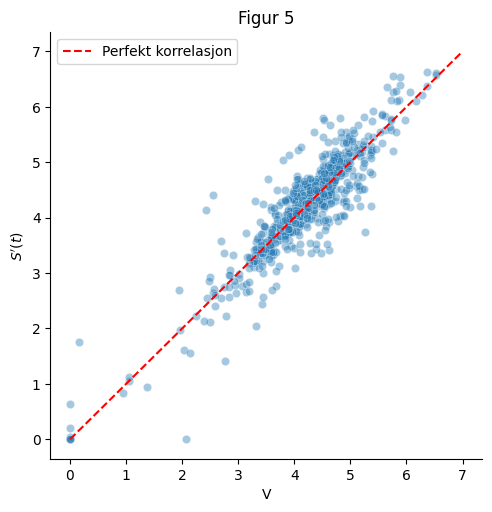

In [102]:
sns.relplot(data=df, x="Speed", y=df.Speed_from_dist.shift(2), alpha=0.4)
plt.plot([0,7],[0,7],"r",linestyle="--", label= "Perfekt korrelasjon")
plt.title("Figur 5")
plt.xlabel("V")
plt.ylabel("$S'(t)$")
plt.legend()
plt.show()

Siden punktene ligger ca gjevnt fordelt på høyre og venstre siden av linjen for perfekt korrelasjon så burde gjennomsnitts verdiene være like. Dette kan vi skjekke ved å utføre hypotesetesting. Koden her er skrevet av AI og modifisert av meg, som en del av en oppgave i timene

In [103]:
t_stat, p_value = stats.ttest_ind(df["Speed"].dropna(), df.Speed_from_dist.shift(2).dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Vi forkaster nullhypotesen - gjennomsnittene er signifikant forskjellige.")
else:
    print("Vi kan ikke forkaste nullhypotesen - det er ingen signifikant forskjell mellom gjennomsnittene.")

T-statistic: -0.7409924874178608
P-value: 0.45883019030767214
Vi kan ikke forkaste nullhypotesen - det er ingen signifikant forskjell mellom gjennomsnittene.


Dette betyr at de har liknende gjennomsnittsverdi. Gjennomsnitts farten er altså ganske lik S'(t). Vi kan se på forskjellen i gjennomsnitt, standaravvik, Q1, Q2, Q3 og maks verdien ved å bruke describe()

In [104]:
df["Speed"].describe()-df["Speed_from_dist"].shift(2).describe()

count    2.000000
mean    -0.037156
std     -0.069458
min      0.000000
25%      0.004736
50%     -0.039591
75%     -0.085012
max     -0.103000
dtype: float64

Da ser vi at det er relativt liten forskjell mellom hver av dem. Vi ser også at den eneste som er en markant høyere enn alle de andre er maks verdien, dette styrker igjen mistanken om et filter som filtrerer ut verdier som er litt raskere enn alle de andre. Filteret har nok da filtrert ut deler av en topp

#### Sammenheng mellom puls og høydeendring

For å finne en sammenheng mellom puls og høydeendring så kan vi derivere høyden med hensyn på tiden for å finne høydeendringen. Da finner vi høydeforskjellen mellom hvert målingspunkt $\dot{h}=\frac{h_0-h_1}{T_0-T_1}$

In [105]:
df["Height_diff"] = (df.Alt.shift(-1)-df.Alt)/(df.Time.shift(-1)-df.Time)

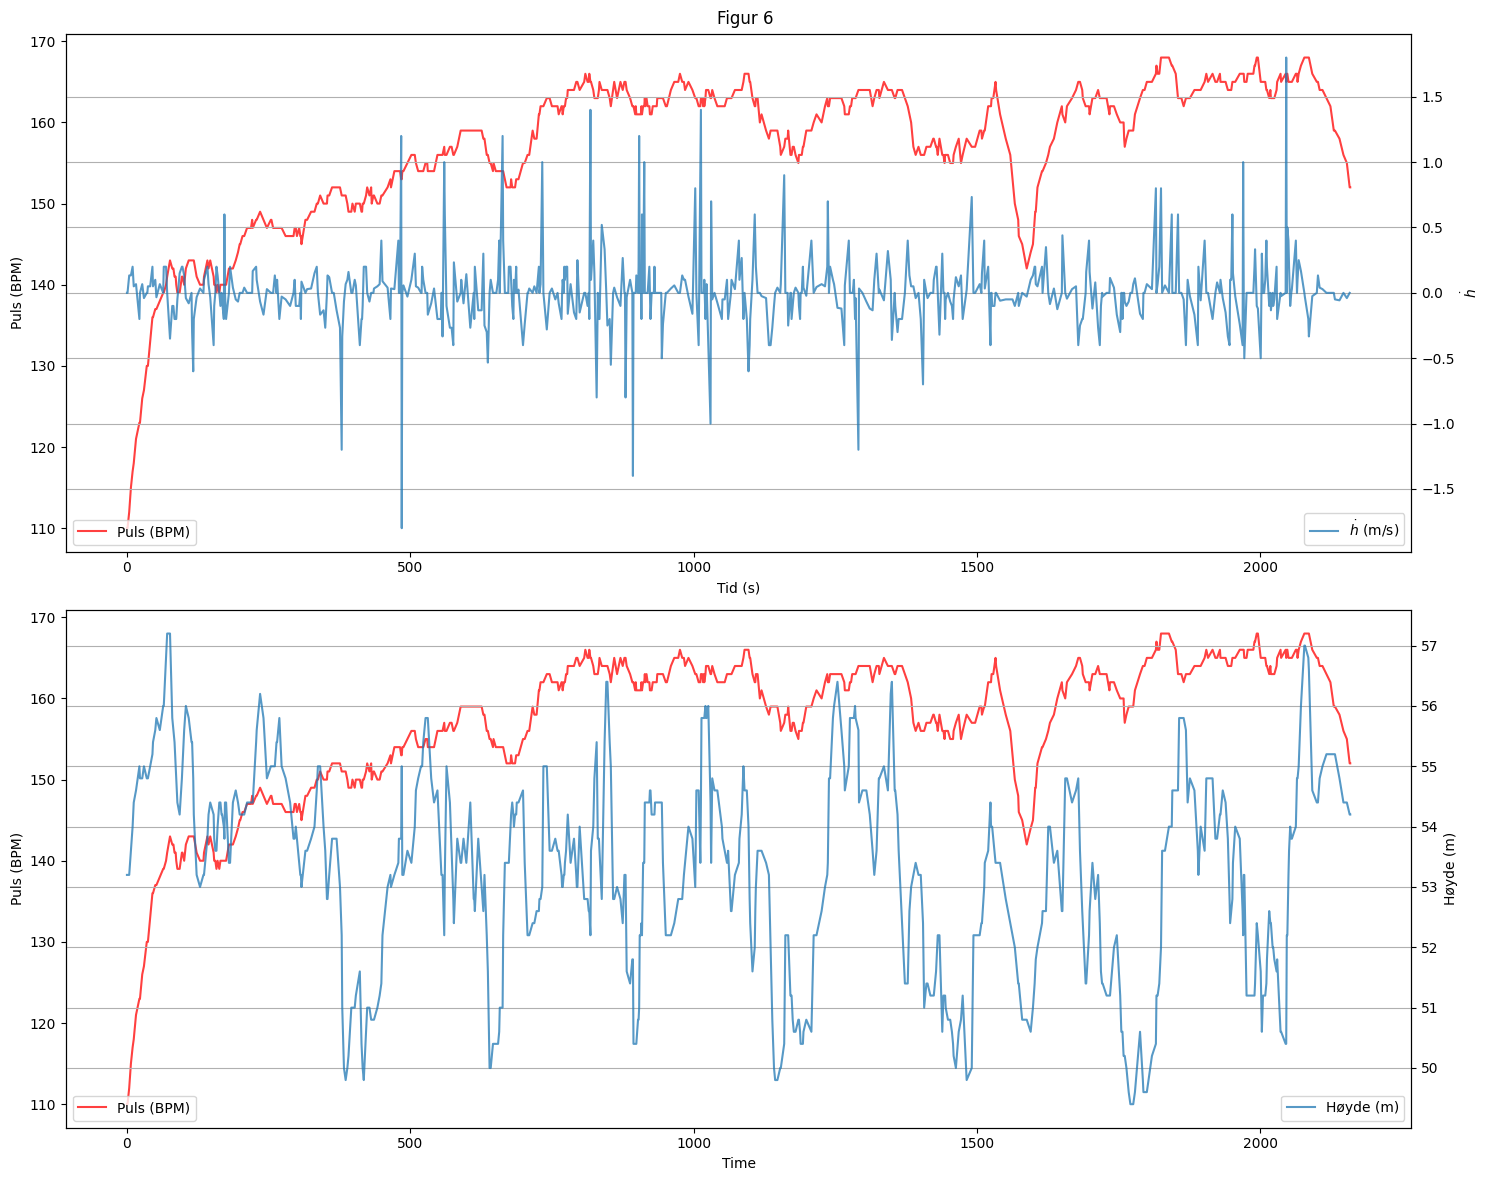

In [106]:
fig, (ax1, ax3) = plt.subplots(2,1,figsize=(15, 12))
plt.suptitle("Figur 6")
sns.lineplot(data=df, x="Time", y="Hr", alpha=0.75, label="Puls (BPM)",color="red", ax=ax1)

ax2 = ax1.twinx()

sns.lineplot(data=df, x="Time", y="Height_diff", alpha=0.75, label="$\dot{h}$ (m/s)",ax=ax2)
plt.grid()
ax1.set_xlabel("Tid (s)")
ax1.set_ylabel("Puls (BPM)")
ax2.set_ylabel("$\dot{h}$")
ax1.legend(loc="lower left")
ax2.legend(loc="lower right")


sns.lineplot(data=df, x="Time", y="Hr", alpha=0.75, label="Puls (BPM)",color="red", ax=ax3)
ax4 = ax3.twinx()

sns.lineplot(data=df, x="Time", y="Alt", alpha=0.75, label="Høyde (m)",ax=ax4)

ax1.set_xlabel("Tid (s)")
ax3.set_ylabel("Puls (BPM)")
ax4.set_ylabel("Høyde (m)")
ax3.legend(loc="lower left")
ax4.legend(loc="lower right")
plt.tight_layout()
plt.grid()
plt.show()

Figur 6 viser puls og høydeendring i samme plot. Her forventet jeg å se at pulsen følger høydeendringen, kanskje litt forskjøvet, men det ser ikke helt sånn ut. Det nederste under i figuren viser høyden og pulsen, det er bare for å gjøre det lettere å visualisere høyden og pulsen opp mot hverandre. For å skjekke om det er en korrelasjon mellom puls og $\dot{h}$ så kan vi se på korrelasjonkoeffisienten

In [107]:
korrelasjon_Hr_h_dot=df["Hr"].corr(df["Height_diff"])
print("r=", korrelasjon_Hr_h_dot)

r= 0.02298079170972745


Det er altså en ganske dårlig korrelasjon mellom puls og $\dot{h}$, men hva med om vi forskyver pulsen?

In [108]:
korrelasjon_Hr_h_dot_shift=[]
for i in range(-20,20):
    korrelasjon_Hr_h_dot_shift.append(df["Hr"].shift(i).corr(df["Height_diff"]))
korrelasjon_Hr_h_dot_shift=np.array(korrelasjon_Hr_h_dot_shift)
print(korrelasjon_Hr_h_dot_shift.argmax(),max(korrelasjon_Hr_h_dot_shift))

9 0.065504235010273


(array([170., 133.,  87.,  91.,  64.,  55.,  33.,  18.,   7.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

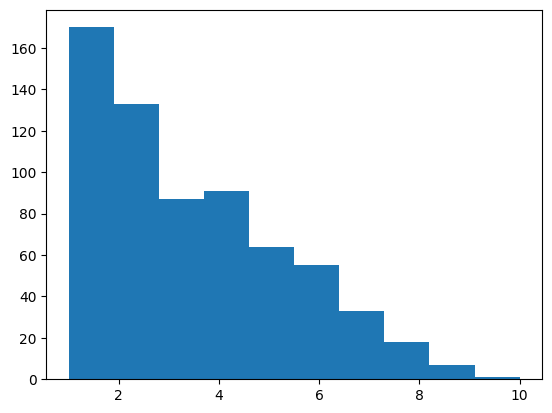

In [115]:
plt.hist((df.Time.shift(-1)-df.Time))

Da får vi at den beste korrelasjonskoeffisienten er $r\approx 0.0655$ ved $i=-20+80=-12$. Dette betyr at det er høyest korrelasjonskoeffisient dersom tiden er forøvet med -12 målinger. Dette kan gi mening, atlså at pulsen stiger litt etter oppoverbakken. Men korrelasjonskoeffisienten er veldig lav. En korrelasjonskeffisient på 1 er en perfekt korrelajson og -1 er negativ korrelasjon.

#### Sammenheng mellom fart og høydeendring

### Analyse av puls

Boxplot

### Analyse av fart

Boxplot

### GPS

Her er løypen som ble gått.

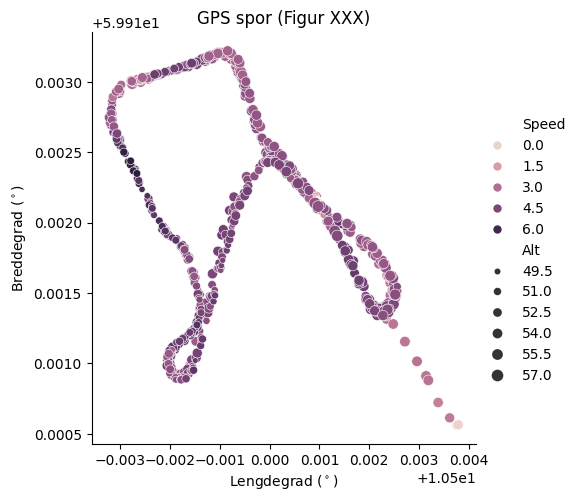

In [109]:
sns.relplot(data=df, x="Long", y="Lat", hue ="Speed", size="Alt", label = "GPS spor")
plt.title("GPS spor (Figur XXX)")
plt.xlabel("Lengdegrad ($^\circ$)")
plt.ylabel("Breddegrad ($^\circ$)")
plt.show()

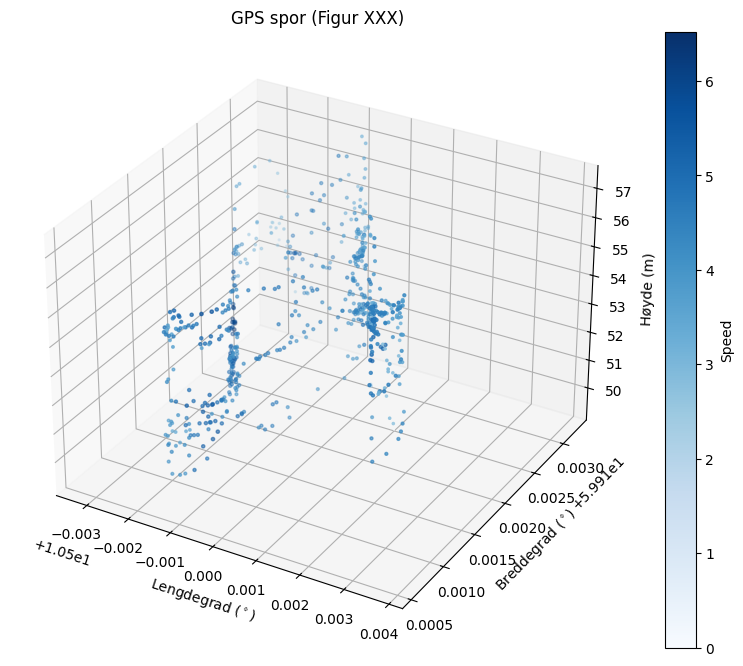

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(df["Long"], df["Lat"], df["Alt"], c=df["Speed"], s=df["Speed"], cmap='Blues', label="GPS spor")

# Title and labels
ax.set_title("GPS spor (Figur XXX)")
ax.set_xlabel("Lengdegrad ($^\circ$)")
ax.set_ylabel("Breddegrad ($^\circ$)")
ax.set_zlabel("Høyde (m)")

# Add a colorbar for the 'Speed' values
plt.colorbar(lineplot, label="Speed")

# Show the plot
plt.show()

### Drøfting og konklusjon

### Ekstra:

In [110]:
assert 1==2

AssertionError: 

In [ ]:
Speed_Speed_from_dist=df[["Speed","Speed_from_dist"]]
#korrelasjon_Speed_Speed_from_dist=Speed_Speed_from_dist.corr()
print("r=",Speed_Speed_from_dist.corr())

In [ ]:
(df.Time.shift(-1)-df.Time).argmin()

In [ ]:
df.loc[140:150,:]